In [1]:
# Import all necessary libraries.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
seed = 42
np.random.seed(seed)

### Conjunto de dados.

Conjunto de mensagens SMS para detecção de spam em telefones celulares.

É composto por 5574 mensagens rotuladas (spam ou ham).

In [3]:
# Read SMS data base with pandas.
# Public set of SMS messages for mobile phone spam research.
# It is composed of 5574 tagged messages (spam or ham).
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
sms = pd.read_table(url, header=None, names=['label', 'message'])
#file='../../../../data/sms.tsv'
#sms = pd.read_table(file, header=None, names=['label', 'message'])

# examine the first 10 rows
print(sms.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### Quantidade de exemplos em cada classe.

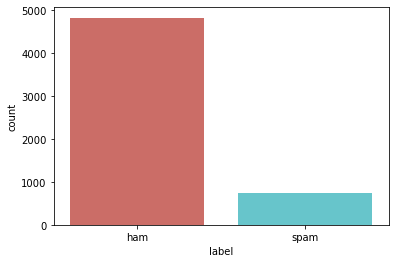

In [4]:
sns.countplot(x='label', data=sms, palette='hls')
plt.show()

### Cria vetores de atributo e rótulo.

In [5]:
# Convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# Create feature and label vectors.
x = sms.message

y = sms.label_num

### Cria os conjuntos de treinamento e validação.

Treinamento: 75%

Validação: 25%

In [6]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed)

### Converte texto em frequência de cada palavra.

+ O objeto da classe `CountVectorizer` é usado para criar uma matriz registrando o número de vezes (frequência) com que cada palavra aparece na mensagem.


+ O método `fit_transform` cria um vocabulário com as palavras presentes no conjunto e converte as mensagens em uma matriz com a frequência de cada palavra no conjunto


+ O método `transform` converte as mensagens de validação em uma matriz com a frequência de cada palavra, baseado no vocabulário criado com o conjunto de treinamento. 

In [7]:
# Convert a collection of text documents into a matrix of token counts.
vect = CountVectorizer()
# Learn the vocabulary dictionary and return term-document matrix for the training set.
x_train_dtm = vect.fit_transform(x_train)
# Transform validation set into document-term matrix.
x_test_dtm = vect.transform(x_test)

### Instancia regressor logístico e o treina.

In [8]:
# Instantiate Logistic classifier.
classifier = LogisticRegression(random_state=seed)
# Train the model.
classifier.fit(x_train_dtm, y_train.ravel())

LogisticRegression(random_state=42)

### Cálculo da acurácia.

Acurácia: quantos exemplos estão correntos dentre todos os exemplos do conjunto.

In [9]:
y_pred_class = classifier.predict(x_test_dtm)

# Calculate accuracy of class predictions.
accuracy_score(y_test, y_pred_class)

0.9856424982053122

### Plotando a matriz de confusão

Uma métrica muito comum para verificar o desempenho de classificadores é a matriz de confusão.

Através dela, podemos extrair várias métricas de desempenho, como veremos mais adiante.

Vejamos o exemplo abaixo. As diferentes cores indicam a quantidade de exemplos num dado grupo, quanto mais escura for a cor, maior o número de exemplos naquele grupo.

<img src="../../../../figures/matriz_de_confusão.png" width="500" height="500">

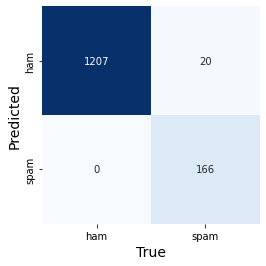

In [10]:
# Plot the confusion matrix
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'], cmap="Blues")
plt.xlabel('True', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
#plt.savefig("confusion_matrix_spam_classification_logistic_regression.png", dpi=600)
plt.show()